In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

# this allows plots to appear directly in the notebook
%matplotlib inline

In [16]:
# read data into a DataFrame
data = pd.read_csv('Advertising.csv', index_col=0)
#data.head()
data.columns = ['TV','Radio','Newspaper','Sales']
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [17]:
# print the shape of the DataFrame
data.shape

(200, 4)

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

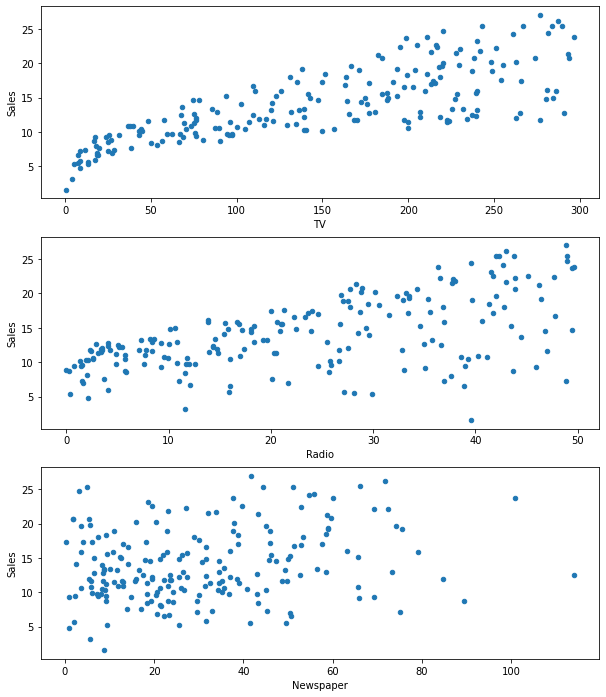

In [18]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(3, 1, sharey=True)
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(10, 12))
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])

## Note 1 : The variance of the errors should be consistent for all observations. 
##          i.e, the variance does not change for each observation or for a range of observations. 
##          This preferred condition is known as homoscedasticity (same scatter). 
##          If the variance changes, then its heteroscedasticity (different scatter).
## Note 2 : heteroscedasticity appears as a cone shape where the spread of the residuals increases in one direction.

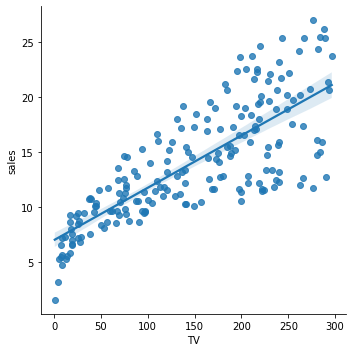

In [19]:
## EXTRA code
import seaborn as sns
data1 = pd.read_csv('Advertising.csv', index_col=0)

sns.lmplot(x='TV',y='sales',data=data1)

In [20]:
# create X and y
#taking only one variable for now
feature_cols = ['TV']
X = data[feature_cols]
y = data.Sales

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)  ## y = (coef_)x + intercept_

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

7.032593549127695
[0.04753664]


In [21]:
# manually calculate the prediction
7.032594 + 0.047537*50

9.409444

Thus, you would predict Sales of **9,409 widgets** in that market.

In [22]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'TV': [50]})
X_new.head()

,TV
0,50


In [23]:
# use the model to make predictions on a new value
lm.predict(X_new)

array([9.40942557])

In [24]:
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
X_new.head()

,TV
0,0.7
1,296.4


In [25]:
# make predictions for those x values and store them
preds = lm.predict(X_new)
preds

array([ 7.0658692 , 21.12245377])

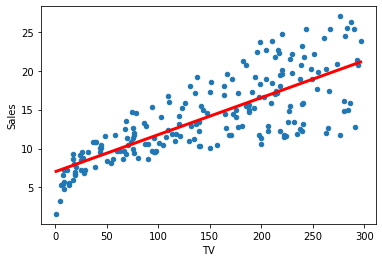

In [26]:
# first, plot the observed data
data.plot(kind='scatter', x='TV', y='Sales')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=3)

## Linear Regression using statsmodel

In [27]:
import statsmodels.api as sm

X = data['TV']
y = data['Sales']

X2 = sm.add_constant(X)
## Why adding constant ?
## sm.add_constant in statsmodel is the same as sklearn's fit_intercept parameter 
## in LinearRegression(). 
## If you don't do sm.add_constant or when LinearRegression(fit_intercept=False), 
## then both statsmodels and sklearn algorithms assume that b=0 in y = mx + b, 
## and it'll fit the model using b=0 instead of calculating what b is supposed 
## to be based on your data.

est = sm.OLS(y, X2)  ## OLS of sm module is asame as LR of sklearn

est2 = est.fit()

print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 27 Dec 2022   Prob (F-statistic):           1.47e-42
Time:                        10:41:17   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

In [28]:
# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
y = data.Sales

#create train and test split
from sklearn import model_selection
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(X,y,test_size=0.3,random_state=100)

In [29]:
#without using train and test split dataset
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

2.938889369459412
[ 0.04576465  0.18853002 -0.00103749]


**Notice** that the coefficient for newspaper is negative, but also fairly small. 

In [30]:
# using train, test datasets
lm = LinearRegression()
lm.fit(xtrain, ytrain)  ## 70% of the data

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)


# predictions  on test dataset
predictions = lm.predict(xtest)
print(sqrt(mean_squared_error(ytest, predictions)))

## to quickly check how good is the rmse of our model ?
## try to use this genric thumb rule : rmse <= 10% mean(target)
print(0.1 * ytrain.mean())

2.652789668879496
[0.0454256  0.18975773 0.00460308]
1.3603977338130557
1.3857857142857148


> Is it relevant to our model? 

Let’s see by calculating the R² value and p-value for each coefficient.

In [31]:
##Assessing the relevancy of the model

X2 = sm.add_constant(X)

est = sm.OLS(y, X2)

est2 = est.fit()

print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 27 Dec 2022   Prob (F-statistic):           1.58e-96
Time:                        10:41:35   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

What are a few key things you learn from this output?

- TV and Radio have significant **p-values**, whereas Newspaper does not. Thus, reject the null hypothesis for TV and Radio (that there is no association between those features and Sales), and fail to reject the null hypothesis for Newspaper.
- TV and Radio ad spending are both **positively associated** with Sales, whereas Newspaper ad spending was **slightly negatively associated** with Sales. (However, this is irrelevant since as you have failed to reject the null hypothesis for Newspaper.)
- This model has a higher **R-squared** (0.897) than the previous model, which means that this model provides a better fit to the data than a model that only includes TV.  ( See this once : https://statisticsbyjim.com/regression/interpret-adjusted-r-squared-predicted-r-squared-regression/ )

In [32]:
# only include TV and Radio in the model
feature_cols = ['TV', 'Radio']
Xnew = data[feature_cols]
ynew = data.Sales

X3 = sm.add_constant(Xnew)
est = sm.OLS(y, X3)
est3 = est.fit()

est3.rsquared

0.8971942610828956

In [33]:
# add Newspaper to the model (which has no association with Sales)
feature_cols = ['TV', 'Radio', 'Newspaper']
Xnew = data[feature_cols]
ynew = data.Sales

X4 = sm.add_constant(Xnew)
est = sm.OLS(y, X4)
est4 = est.fit()

est4.rsquared

0.8972106381789522

In [34]:
import numpy as np

# set a seed for reproducibility
np.random.seed(12345)

# create a Series of booleans in which roughly half are True
nums = np.random.rand(len(data))
print(nums)
mask_large = nums > 0.5
print(mask_large)
# initially set Size to small, then change roughly half to be large
data['Size'] = 'small'
data.loc[mask_large, 'Size'] = 'large'
data.head()

[9.29616093e-01 3.16375555e-01 1.83918812e-01 2.04560279e-01
 5.67725029e-01 5.95544703e-01 9.64514520e-01 6.53177097e-01
 7.48906638e-01 6.53569871e-01 7.47714809e-01 9.61306736e-01
 8.38829794e-03 1.06444377e-01 2.98703714e-01 6.56411183e-01
 8.09812553e-01 8.72175914e-01 9.64647597e-01 7.23685347e-01
 6.42475328e-01 7.17453621e-01 4.67599007e-01 3.25584678e-01
 4.39644606e-01 7.29689083e-01 9.94014586e-01 6.76873712e-01
 7.90822518e-01 1.70914258e-01 2.68492758e-02 8.00370244e-01
 9.03722538e-01 2.46762104e-02 4.91747318e-01 5.26255167e-01
 5.96366010e-01 5.19575451e-02 8.95089528e-01 7.28266180e-01
 8.18350011e-01 5.00222753e-01 8.10189409e-01 9.59685257e-02
 2.18950044e-01 2.58719062e-01 4.68105754e-01 4.59373203e-01
 7.09509780e-01 1.78053006e-01 5.31449884e-01 1.67742229e-01
 7.68813918e-01 9.28170549e-01 6.09493658e-01 1.50183495e-01
 4.89626704e-01 3.77344954e-01 8.48601412e-01 9.11097229e-01
 3.83848721e-01 3.15495903e-01 5.68394153e-01 1.87818035e-01
 1.25841544e-01 6.875958

,TV,Radio,Newspaper,Sales,Size
1,230.1,37.8,69.2,22.1,large
2,44.5,39.3,45.1,10.4,small
3,17.2,45.9,69.3,9.3,small
4,151.5,41.3,58.5,18.5,small
5,180.8,10.8,58.4,12.9,large


For scikit-learn, you need to represent all data **numerically**. If the feature only has two categories, you can simply create a **dummy variable** that represents the categories as a binary value:

In [35]:
# create a new Series called IsLarge
data['IsLarge'] = data.Size.map({'small':0, 'large':1})
data.head()

,TV,Radio,Newspaper,Sales,Size,IsLarge
1,230.1,37.8,69.2,22.1,large,1
2,44.5,39.3,45.1,10.4,small,0
3,17.2,45.9,69.3,9.3,small,0
4,151.5,41.3,58.5,18.5,small,0
5,180.8,10.8,58.4,12.9,large,1


Let's redo the multiple linear regression and include the **IsLarge** predictor:

In [36]:
# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper', 'IsLarge']
X = data[feature_cols]
y = data.Sales

# instantiate, fit
lm = LinearRegression()
lm.fit(X, y)

# print coefficients
#list(zip(feature_cols, lm.coef_))

dfCoeffients = pd.DataFrame(data = lm.coef_, index = feature_cols , columns = ["Slope / Coeffient"])
dfCoeffients

,Slope / Coeffient
TV,0.045720
Radio,0.188728
Newspaper,-0.001098
IsLarge,0.057424


## Handling Categorical Predictors with More than Two Categories

Let's create a new feature called **Area**, and randomly assign observations to be **rural, suburban, or urban**:

In [37]:
# set a seed for reproducibility
np.random.seed(123456)

# assign roughly one third of observations to each group
nums = np.random.rand(len(data))
mask_suburban = (nums > 0.33) & (nums < 0.66)
mask_urban = nums > 0.66
data['Area'] = 'rural'
data.loc[mask_suburban, 'Area'] = 'suburban'
data.loc[mask_urban, 'Area'] = 'urban'
data.head()

,TV,Radio,Newspaper,Sales,Size,IsLarge,Area
1,230.1,37.8,69.2,22.1,large,1,rural
2,44.5,39.3,45.1,10.4,small,0,urban
3,17.2,45.9,69.3,9.3,small,0,rural
4,151.5,41.3,58.5,18.5,small,0,urban
5,180.8,10.8,58.4,12.9,large,1,suburban


You have to represent Area numerically, but  can't simply code it as 0=rural, 1=suburban, 2=urban because that would imply an **ordered relationship** between suburban and urban (and thus urban is somehow "twice" the suburban category).

Instead, create **another dummy variable**:

In [38]:
# create three dummy variables using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(data.Area, prefix='Area').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
data = pd.concat([data, area_dummies], axis=1)
data.head()

,TV,Radio,Newspaper,Sales,Size,IsLarge,Area,Area_suburban,Area_urban
1,230.1,37.8,69.2,22.1,large,1,rural,0,0
2,44.5,39.3,45.1,10.4,small,0,urban,0,1
3,17.2,45.9,69.3,9.3,small,0,rural,0,0
4,151.5,41.3,58.5,18.5,small,0,urban,0,1
5,180.8,10.8,58.4,12.9,large,1,suburban,1,0


Here is how you interpret the coding:
- **rural** is coded as Area_suburban=0 and Area_urban=0
- **suburban** is coded as Area_suburban=1 and Area_urban=0
- **urban** is coded as Area_suburban=0 and Area_urban=1

Why do you only need **two dummy variables, not three?** Because two dummies capture all of the information about the Area feature, and implicitly defines rural as the baseline level. (In general, if you have a categorical feature with k levels, you create k-1 dummy variables.)

If this is confusing, think about why you only needed one dummy variable for Size (IsLarge), not two dummy variables (IsSmall and IsLarge).

Let's include the two new dummy variables in the model:

In [39]:
# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper', 'IsLarge', 'Area_suburban', 'Area_urban']
X = data[feature_cols]
y = data.Sales

# instantiate, fit
lm = LinearRegression()
lm.fit(X, y)

# print coefficients
# print(feature_cols, lm.coef_)
dfCoeffients_ = pd.DataFrame(data = lm.coef_, index = feature_cols , columns = ["Slope / Coeffient"])
dfCoeffients_

,Slope / Coeffient
TV,0.045744
Radio,0.187867
Newspaper,-0.001088
IsLarge,0.077397
Area_suburban,-0.106563
Area_urban,0.268138
